We got practice working with vectors, which will serve as a foundation.

In this file, we'll analyze real-world data on university rankings. We'll expand our knowledge of R's data structures as we explore how to create, index, and perform operations on **matrices**.

Let's say we've been accepted a number of top universities. To decide which to attend, we want to find a way to score them using data on `education quality`, `influence`, `cost`, and `other factors`. The data we'll be working with come from the [Times Higher Education World University Ranking data set](https://www.kaggle.com/mylesoneill/world-university-rankings). The top 100 universites in the world are ranked [using various criteria](https://cwur.org/methodology/preprint.pdf) on education quality and influence around the world. We've created a smaller data set containing data we'll need during this working file. Here are the first few rows:

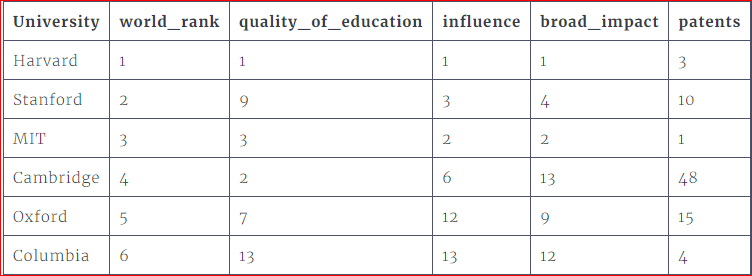

The data is arranged into **rows** and **columns**. Each row corresponds to a specific university, and each column contains information about a different ranking for each university. Higher rankings are represented by lower numbers. For example, Harvard's ranking for `world_rank` is higher than Stanford's.

To work with the data in R, we could create a vector for each university. Instead, we'll learn to use a __matrix__ to hold all university data in one place. While vectors are one-dimensional, matrices are **two-dimensional** and consist of rows and columns in a rectangular layout:

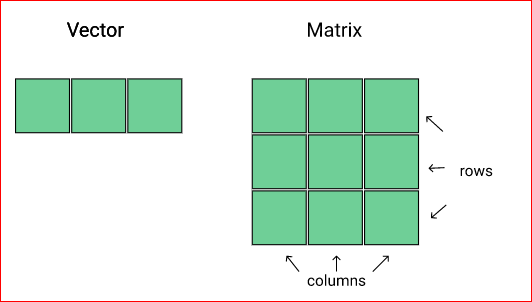

Like vectors, matrices hold data of **one type** (such as numeric or logical). A matrix can contain as many rows and columns as needed, so we can create one containing rankings for all the universities we've been accepted to.

In this file, we'll work with data stored in a matrix as we analyze university ranking and tuition data to decide on a university to attend.

Let's start by creating a matrix containing the university ranking data so we can begin analyzing it to find our ideal university.

We'll begin with vectors containing the rankings for each university.

`harvard <- c(1,1,1,1,3)
stanford <- c(2,9,3,4,10)
MIT <- c(3,3,2,2,1)
cambridge <- c(4,2,6,13,48)
oxford <- c(5,7,12,9,15)
columbia <- c(6,13,13,12,4)`

Combining vectors into matrices is straightfoward because of similarities in the two data structures. Both consist of a single data type (here, numeric). In this case, we can picture creating a matrix by stacking university ranking vectors one on top of the other with elements lined up by position:

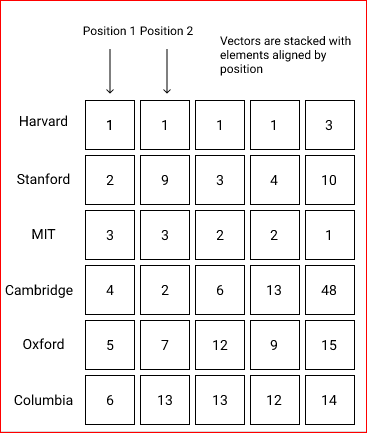

To combine vectors into a matrix, we can use the function `rbind()`. The "r" in `rbind()` stands for rows — this function allows us to combine multiple vectors **by row**. To demonstrate, let's combine the harvard and stanford vectors using `rbind()`:

`harv_stan <- rbind(harvard, stanford)`

The resulting matrix contains rankings for Harvard and Stanford:

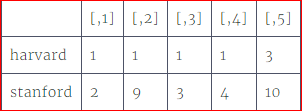

We can also use rbind() to add a single row to an existing matrix, or to combine two matrices by stacking them. For example:

`rbind(harv_stan, MIT)`

Using `rbind()`, we have added the MIT vector to harv_stan as a new row:

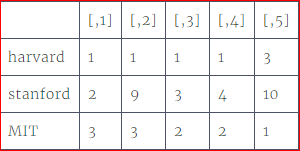

**Task**

* Let's create a matrix containing all the university data.

**Answer**

`harvard <- c(1,1,1,1,3)
stanford <- c(2,9,3,4,10)
MIT <- c(3,3,2,2,1)
cambridge <- c(4,2,6,13,48)
oxford <- c(5,7,12,9,15)
columbia <- c(6,13,13,12,4)
uni_matrix <- rbind(harvard,stanford,MIT,cambridge,oxford,columbia)
print(uni_matrix)
print(columbia)`

When we use the `rbind()` function to create a matrix from vectors with name attributes, the vector names are retained as row name attributes. However, our columns don't have any name attributes associated with them. Adding names to rows or columns of a matrix is similar to naming elements of a vector.

Keep in mind that attributes are different from elements of vectors or matrices — they are not stored in these data structures, and we cannot perform operations on them. Attributes make interpreting the contents of vectors and matrices easier.

In the previous file, we learned to add name attributes to vectors using the attribute accessor function `names()`. Since matrices have both rows and columns, there are separate functions for adding name attributes to each:

* Rows: `rownames()`
* Columns: `colnames()`

We already have university names for rows of `uni_matrix`, but we need to add column names so that we can see the categories for each university's rankings.

**Task**

Name the columns of uni_matrix using the categories vector.

**Answer**

`categories <- c("world_rank", "quality_of_education", "influence", "broad_impact" ,"patents")`

`colnames(uni_matrix) <- categories`

Let's return to our initial goal: Deciding which university to attend. As we look at our data, we notice that while we have information to help us assess education quality and impact of the six universities, we also would like to have information on the cost.

To address this, we've done some research and come up with data on annual tuition, in U.S. dollars, for each university:

* **Harvard** `$`43,280
* **Stanford** `$`45,000
* **MIT** `$`45,016
* **Cambridge** `$`49,350
* **Oxford** `$`28,450
* **Columbia** `$`55,161

We'll want to add this tuition data to our matrix so that we can proceed with analyzing the data to maximize our university choice.

First, let's create a vector containing the tuition data:

`tuition <- c(43280, 45000, 45016, 49350, 28450, 55161)`

Next, we need to add the `tuition` vector to `uni_matrix` as a column. First, we should make sure that the new vector is of the right dimensions before combining it with our matrix. Recall that R's "recycling" behavior can result in unintended

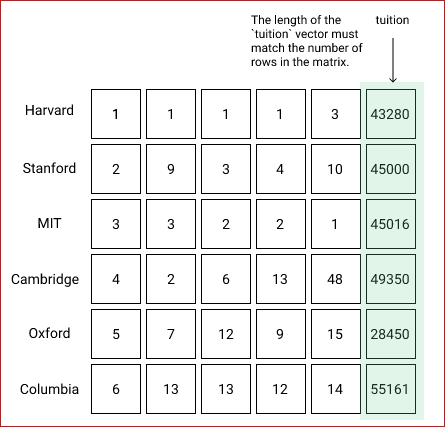

Since we're working with a small data set, it's easy to visualize the vector length and compare it to the number of rows in the matrix. However, as we work with larger data sets, this won't be the case.

We learned how to use the `length()` [function](https://www.dataquest.io/m/332-introduction-to-programming-in-r/) to identify the number of elements in a vector. Now, we'll learn how to identify the dimensions (numbers of rows and columns) of a matrix using the `dim()` function.

When a matrix is passed to the `dim()` function, the function output is a vector that contains two numbers: the number of rows and the number of columns in the matrix:

`dim(harv_stan)`

`2 5 # two rows, five columns`

In the example above, the matrix harv_stan has two rows and five columns.

Since the `dim()` function ouputs a vector, we can build on what we learned about indexing vectors by position. We can write an expression to compare the length of a vector and the number of rows or columns in a matrix to determine if they are the same.

If we want to add the vector `harv_stan_tuition` as a new column to the `harv_stan` matrix, we'll want the length of `harv_stan_tuition` to equal the number of rows in `harv_stan`. Recall that the order of dimensions in the `dim()` output is always: **rows, columns**.

We can pass the `harv_stan` matrix to the `dim()` function, and then used brackets to index the resulting vector of rows and columns. We will use `[1]` to return the number of rows, which is the element in the first position of the vector. We can write one line of code:

`dim(harv_stan)[1]`

To test whether the number of rows in the `harv_stan` matrix is equal to the length of the `harv_stan_tuition` vector, we can write an expression to return a logical value (either `TRUE` or `FALSE`):

`dim(harv_stan)[1] == length(harv_stan_tuition)`

Recall that the operator `==` denotes "is equal to". Since the number of rows in `harv_stan` is equal to the length of `harv_stan_tuition`, the output of this expression is:

`TRUE`

Let's write an expression to confirm that the tuition vector is as long as uni_matrix is tall.

`tuition <- c(43280,45000,45016,49350,28450,55161)`

`dim(uni_matrix)[1] == length(tuition)`

Now that we have confirmed that the `tuition` vector is the same length as the number of rows in `uni_matrix`, we can add it to the matrix as a column.

We used the `rbind()` function to combine the university rankings vectors into a single matrix. The `rbind()` functions combines vectors or matrices by `row`.

To add a vector to a matrix as a column or to join two matrices together by column, we'll use the `cbind()` function. The `cbind()` function combines vectors or matrices by **column**.

`cbind(harv_stan, harv_stan_tuition)`

The resulting matrix contains rankings for Harvard and Stanford, as well as tuition information for the two schools:

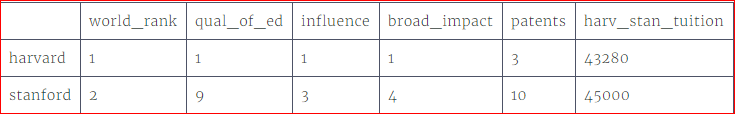

Note that the name attribute of the `harv_stan_tuition` vector is retained when it is appended to the matrix.

**Task**

Add the tuition vector as a new column to uni_matrix.

**Answer**

`tuition <- c(43280, 45000, 45016, 49350, 28450, 55161)`

`complete_matrix <- cbind(uni_matrix,tuition)
print(complete_matrix)`

# Indexing Matrix

We learned to index vectors to extract specfic elements. We can also index matrices. Since they are two-dimensional objects, we can either:

* Index to select specific values
* Index to select rows or column

Let's look at the `harv_stan` matrix as an example:

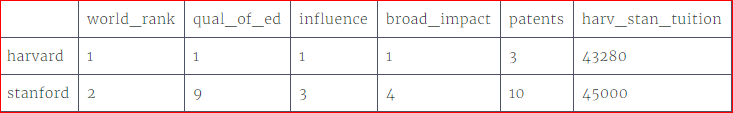

Let's say we want to extract the `patents` ranking for Stanford. Since matrices are two-dimensional, we'll need to specify the location of the element we want to extract in terms of its row and its column. In this matrix, `Stanford` is **row 2** and `patents` is **column 5**.

Syntax for indexing matrices is similar to that for indexing vectors.

`harv_stan[2, 5]`

`10`

We can also index matrices by row and column names instead of positions:

`harv_stan["stanford", "patents"]`

`10`

When indexing by name, be sure to remember to surround row and column names with quotes.

What if we want to select more than one element of a matrix? Let's index to select broad_impact and patents for Harvard and Stanford:

Since the `broad_impact` and `patents` columns are next to each other in the matrix, we can specify the range of columns (4:5) in our indexing syntax:

`harv_stan[2, 4:5]`

`broad_impact      patents 
           4           10`

We can also index matrices to extract elements that aren't next to each other. Let's say we're interested in extracting `world_rank and influence for Harvard and Stanford`

In this case, we'll use `c()` to specify vectors containing the rows and columns in our indexing syntax:

`harv_stan[c(1,2), c(1,3)]`

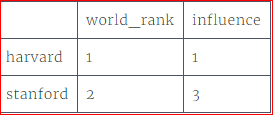

As was the case for extracting single elements, we can also index to extract multiple elements using names instead of positions:

`harv_stan[c("harvard", "stanford"), c("world_rank", "influence")]`

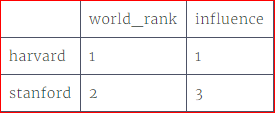

**Task**

* Index by name attributes to extract the following values from complete_matrix:

 * Oxford's influence rank
 * Cambridge's and Stanford's patents rank
 
 **Answer**
 
`oxford_influence <- complete_matrix["oxford","influence"]`

`cam_stan_patents <- complete_matrix[c("cambridge","stanford"),"patents"]`

We're now able to extract subsets of values from matrices. In some instances, though, it makes sense to index a matrix to extract entire rows or columns, such as all the rankings for a particular university.

For example, let's index `harv_stan` to extract all the rankings for Harvard:

All the Harvard rankings are in row 1 of our matrix. To indicate that we want to index to extract all elements in row 1, leave the column position in the indexing expression blank:

`harv_stan["harvard",]`

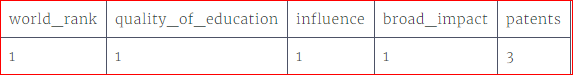

If we want to select the quality of education rankings for each university in our matrix, we'll index to select all elements in that column (column 2).

When we write an expression to extract an entire row or column from a matrix, we only need to specify the name of that row or column. The other position in the expression is left blank. Since column number always comes after row number, we would write:

`harv_stan[,"quality_of_education"]`

We can index to select multiple rows and columns from a matrix.

To select `quality_of_education`, `influence`, and `broad_impact` rankings for all universities, we would index by those columns:

We can write an expression to specify selection of the columns using `c()`:

`harv_stan[,c("quality_of_education", "influence", "broad_impact")]`

Note that, since we selected columns, `c("quality_of_education", "influence", "broad_impact")` comes after the comma. If we were indexing to select multiple rows, they would come before the comma.

**Task**

* Index complete_matrix to extract the following:
 1. Oxford's rankings
 2. Influence ranks for all universities
 3. All of Harvard's and MIT's rankings
 4. Influence and patents rankings for all universities

**Answer**

`oxford_rank <- complete_matrix["oxford",]
influence <- complete_matrix[,"influence"]
harv_mit_rank <- complete_matrix[c("harvard","MIT"),]
influence_patents <- complete_matrix[,c("influence", "patents")]`

Now that we've learned to combine vectors into matrices and to extract elements, let's return to our initial goal: Analyzing the university ranking data to decide on a university to attend.

To answer this question, let's develop a score for each university that is an aggregate of the rankings and tuition information available in `complete_matrix`. We'll rank the universities for each category we have data for: `world_rank`, `quality_of_education`, `influence`, `broad_impact`, `patents`, and `tuition`.

Then, we can calculate a score for each university from the sum of its rankings.

Let's rank each university relative to others in the data set.

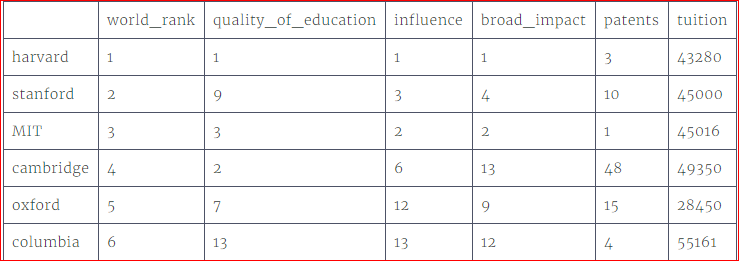

We'll use the `rank()` function, along with an expression that indexes the matrix, to specify the category we want to rank the universities by. The `rank()` function returns a vector of numeric values. For example, to rank universities by `quality_of_education`, we'd write:

`rank(complete_matrix[,"quality_of_education"])`

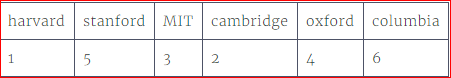

**Task**

* Use rank() to rank the universities for each of the following categories:

 - world_rank
 - quality_of_education
 - influence
 - broad_impact
 - patents
 - tuition
 
**Answer**

`world_rank_rank <- rank(complete_matrix[,"world_rank"])
quality_of_education_rank <- rank(complete_matrix[,"quality_of_education"])
influence_rank <- rank(complete_matrix[,"influence"])
broad_impact_rank <- rank(complete_matrix[,"broad_impact"])
patents_rank <- rank(complete_matrix[,"patents"])
tuition_rank <- rank(complete_matrix[,"tuition"])`


Now that we've ranked the six universities by each category, let's combine the vectors containing the ranks into a single matrix (ranks_matrix) using rbind():

`ranks_matrix <- rbind(world_rank_rank, quality_of_education_rank,influence_rank, broad_impact_rank, patents_rank, tuition_rank)`

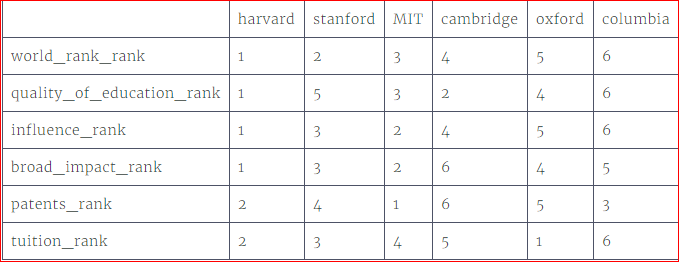

Note that because we used `rbind()`, we combined the vectors by rows. The new matrix contains the vectors for each category stacked one on top of the other. Each university's rankings are in a different column.

Now, we can calculate a score for each university. Smaller scores indicate higher rankings. Let's assume that we value every category in our university selection equally. **In future courses, we'll learn what to do if, say, low tuition matters more to you than a university's rank for generating patents**.

To calculate an aggregate score for each university, let's calculate the **sum** of its rankings in every category. We'll use indexing to specify the university column we want to calculate a score for using `sum()`.

For example, we'll calculate the sum of the rankings for Harvard:

`sum(ranks_matrix[,"harvard"])`

`8`

Because the university rankings are arranged in columns of `ranks_matrix`, we place harvard after the comma in the indexing expression.

**Task**

* Calculate the sums of each university's rankings in ranks_matrix:
 - harvard
 - stanford
 - MIT
 - cambridge
 - oxford
 - columbia
 
**Answer**

`ranks_matrix <- rbind(world_rank_rank, quality_of_education_rank, influence_rank, broad_impact_rank, patents_rank, tuition_rank)
sum(ranks_matrix[,"harvard"])
sum(ranks_matrix[,"stanford"])
sum(ranks_matrix[,"MIT"])
sum(ranks_matrix[,"cambridge"])
sum(ranks_matrix[,"oxford"])
sum(ranks_matrix[,"columbia"])`

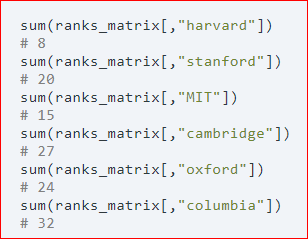

Based on our analysis, Harvard earns the top score.